### CIFAR-10 Image Classification Using CNN

#### Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# 50000 is the number of samples, 32 is the width, 32 is the length
# and 3 is due to 3 channels for RGB values
X_train.shape

(50000, 32, 32, 3)

#### Visualizing Data

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


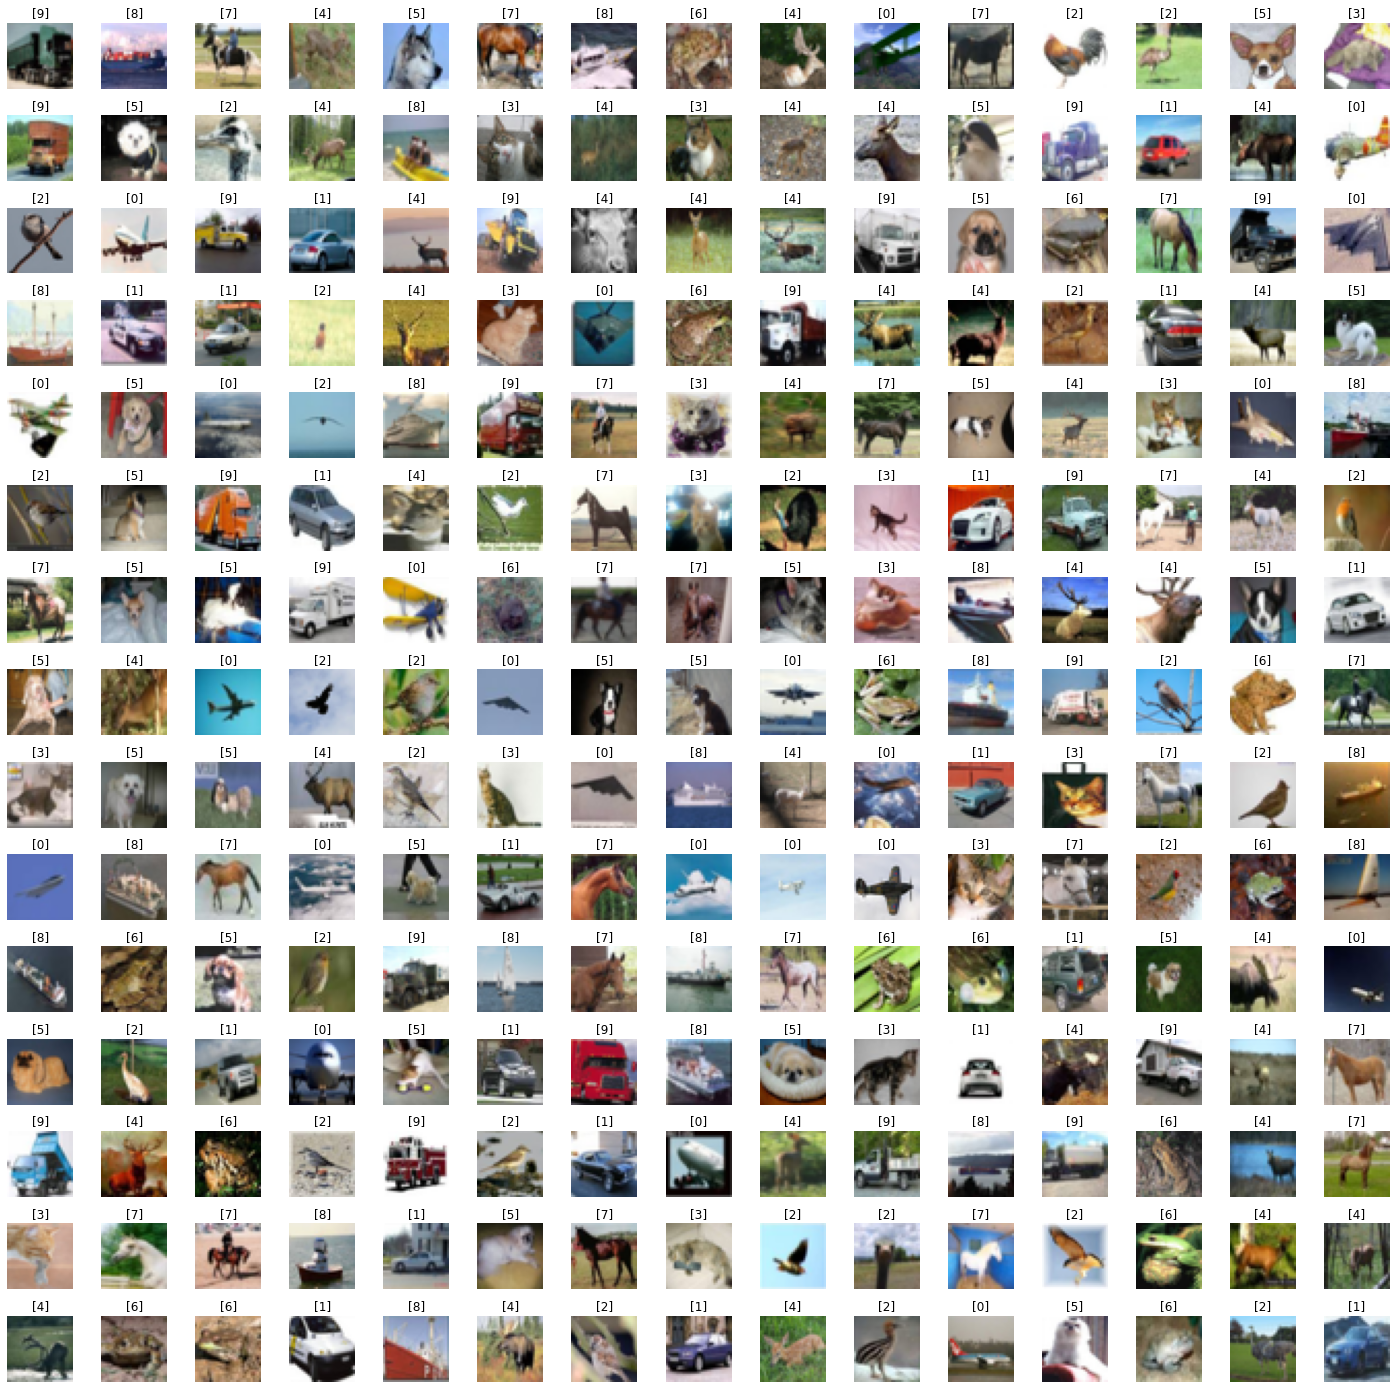

In [4]:
# Since I want to visualize 15 by 15 images, I have defined these variables
W_grid = 15
L_grid = 15

# Creating a subplot that allows me to view 225 images of size 25 * 25
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)

# Populating the subplots with random images from training data set
# and their classification
for i in np.arange(L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

# Providing some space for a cleaner look
plt.subplots_adjust(hspace = 0.4)

#### Preparing Data

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
number_cat = 10

In [7]:
# We are converting the decimal values into binary values to get
# appropriate output neurons to fire

import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
y_test = keras.utils.to_categorical(y_test, number_cat)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
Input_shape = X_train.shape[1:]

#### Training the Model

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [11]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

In [12]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

In [13]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=2, shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8346 - accuracy: 0.3280
Epoch 2/2
1563/1563 [==============================] - 97s 62ms/step - loss: 1.1533 - accuracy: 0.5965


#### Evaluating the Model

In [14]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 4s 11ms/step - loss: 0.9572 - accuracy: 0.6705
Test Accuracy: 0.6704999804496765


In [15]:
predicted_classes = cnn_model.predict_classes(X_test)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [16]:
y_test = y_test.argmax(1)

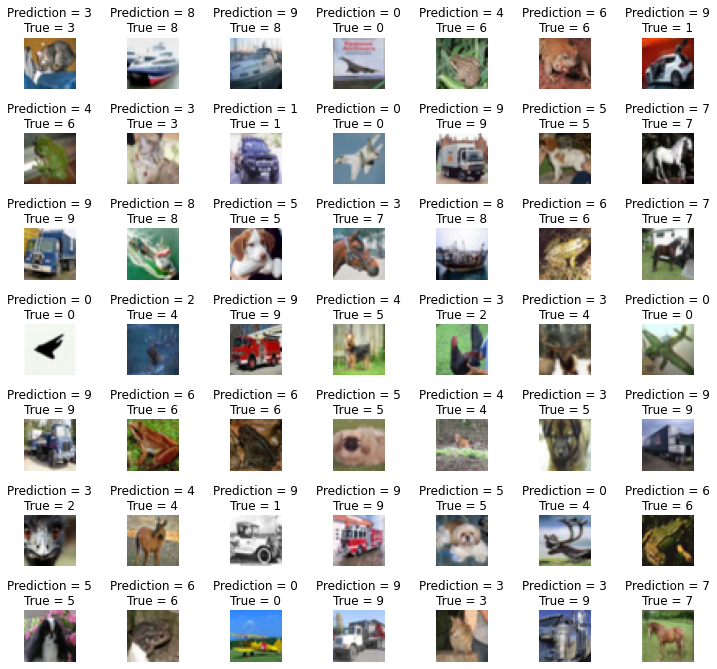

In [17]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

<AxesSubplot:>

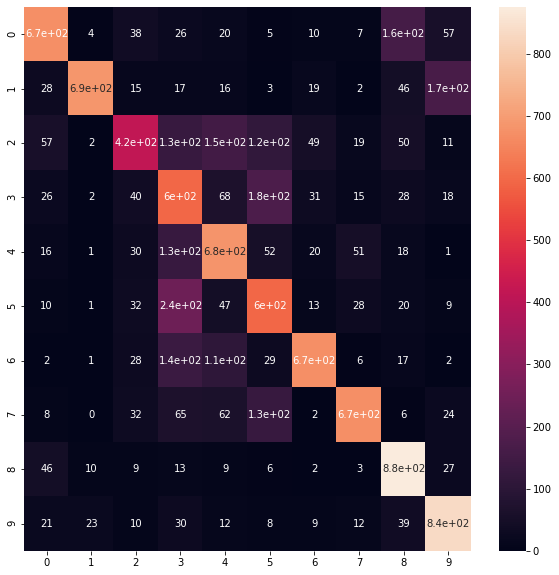

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

#### Saving the Model

In [19]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

#### Data Augmentation for CIFAR-10 Dataset

Learning how to augment the data

In [ ]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
n = 12
X_train_sample = X_train[:n]
X_train_sample.shape

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(vertical_flip=True)
datagen_train.fit(X_train_sample)

In [ ]:
from PIL.Image import fromarray

fig = plt.figure(figsize = (20, 2))
for X_batch in datagen_train.flow(X_train_sample, batch_size=n):
    for i in range(n):
        X_batch = X_batch.astype(np.uint8)
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(fromarray(X_batch[i]))
        ax.axis('off')
    fig.suptitle('Augmented Images')
    plt.show()
    break

Actually training the model with newly manipulated data

In [21]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)

In [22]:
datagen.fit(X_train)

In [24]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=2)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
1563/1563 [==============================] - 101s 64ms/step - loss: 1.6724 - accuracy: 0.3980
Epoch 2/2
1563/1563 [==============================] - 104s 66ms/step - loss: 1.5703 - accuracy: 0.4404


In [41]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 15.2181 - accuracy: 0.2433
Test accuracy 0.24330000579357147


In [26]:
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_augmented_model.h5')
cnn_model.save(model_path)